# Mice Protein Expression Data Set
## UCI Machine Learning Repository
## Center for Machine Learning and Intelligent Systems

### Abstract

<div style="text-align: justify; LINE-HEIGHT:20px"> The data file ‘Data_Cortex_Nuclear.xls’ was imported into the interactive shell iPython as filename 'AllProtein'. The libraries pandas, matplotlib and numpy were imported as pd, plt and np respectively. Data was then checked for type, sample rows column names and size (found 1080 by 82). Data cleaning was initially performed by selecting for 11 target protein expression attributes, which had previously been found to have high correlations with learning outcomes. The Boolean categorical labels Treatment, Genotype and Behavior were then replaced with binary Boolean values 0 or 1, and the attribute label Class was generated with the resultant binary Boolean labels to produce 8 unique integer Class labels. A scatter matrix of the uncleaned data was checked to provide direction for analysis, followed by removal of outliers and NaN values. Outliers were identified as falling out a 99th percentile range from any raw protein expression data column. During outlier analysis mouse 3484 was identified as having over 60 outlier values, and was removed from the data set. The outliers and NaN values were then filled with a Class mean.<br><br> Following cleaning the data was visualised through a variety of plots to help gain understanding and insight. The data was then modelled with a K-Nearest Neighbour Classification and a Decision Tree Model. The K-Nearest Model worked best with 5 neighbours, distance weighting and Manhattan distance (p = 1). The Decision Tree Models had an average accuracy ranging between 0.79 to 0.98, indicating extremely good predictive capability.</div>

### Introduction

<div style="text-align: justify; LINE-HEIGHT:20px"> Add text </div>

Add table 1

Add figure 1

### Aim

<div style="text-align: justify; LINE-HEIGHT:20px"> Add text </div>

### Data Imporation and Exploration

<div style="text-align: justify; LINE-HEIGHT:20px">The data analysis toolkit pandas (McKinney 2010), the scientific computing package numpy, the 2D plotting library matplotlib (Hunter 2007) and the library for opening URLs urllib2 (core python module) were imported into IPython (Perez & Granger 2007) as pd, np, plt and urllib2 respectively. The Excel file ‘Data_Cortex_Nuclear.xls’ was imported from UCI’s machine learning repository (http://archive.ics.uci.edu/ml/) IPython and named “allProtein”.</div>

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import urllib2

In [2]:
# Importing the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls"
proteinExpression = pd.read_excel(urllib2.urlopen(url), headers=0)

In [4]:
# Checking the column (attribute) names - exploring data with a list
columnIDlist = proteinExpression.columns.tolist()
print columnIDlist

[u'MouseID', u'DYRK1A_N', u'ITSN1_N', u'BDNF_N', u'NR1_N', u'NR2A_N', u'pAKT_N', u'pBRAF_N', u'pCAMKII_N', u'pCREB_N', u'pELK_N', u'pERK_N', u'pJNK_N', u'PKCA_N', u'pMEK_N', u'pNR1_N', u'pNR2A_N', u'pNR2B_N', u'pPKCAB_N', u'pRSK_N', u'AKT_N', u'BRAF_N', u'CAMKII_N', u'CREB_N', u'ELK_N', u'ERK_N', u'GSK3B_N', u'JNK_N', u'MEK_N', u'TRKA_N', u'RSK_N', u'APP_N', u'Bcatenin_N', u'SOD1_N', u'MTOR_N', u'P38_N', u'pMTOR_N', u'DSCR1_N', u'AMPKA_N', u'NR2B_N', u'pNUMB_N', u'RAPTOR_N', u'TIAM1_N', u'pP70S6_N', u'NUMB_N', u'P70S6_N', u'pGSK3B_N', u'pPKCG_N', u'CDK5_N', u'S6_N', u'ADARB1_N', u'AcetylH3K9_N', u'RRP1_N', u'BAX_N', u'ARC_N', u'ERBB4_N', u'nNOS_N', u'Tau_N', u'GFAP_N', u'GluR3_N', u'GluR4_N', u'IL1B_N', u'P3525_N', u'pCASP9_N', u'PSD95_N', u'SNCA_N', u'Ubiquitin_N', u'pGSK3B_Tyr216_N', u'SHH_N', u'BAD_N', u'BCL2_N', u'pS6_N', u'pCFOS_N', u'SYP_N', u'H3AcK18_N', u'EGR1_N', u'H3MeK4_N', u'CaNA_N', u'Genotype', u'Treatment', u'Behavior', u'class']


In [7]:
# Confirming the data types (exploration) - series created and counted
nativeDataTypes = proteinExpression.dtypes
countDataTypes = nativeDataTypes.value_counts()
print countDataTypes

float64    77
object      5
dtype: int64


In [8]:
# Checking the value counts of categorical columns
proteinExpression[['Genotype', 'Treatment', 'Behavior', 'class']].apply(pd.Series.value_counts)

,Genotype,Treatment,Behavior,class
C/S,NaN,NaN,525.0,NaN
Control,570.0,NaN,NaN,NaN
Memantine,NaN,570.0,NaN,NaN
S/C,NaN,NaN,555.0,NaN
Saline,NaN,510.0,NaN,NaN
Ts65Dn,510.0,NaN,NaN,NaN
c-CS-m,NaN,NaN,NaN,150.0
c-CS-s,NaN,NaN,NaN,135.0
c-SC-m,NaN,NaN,NaN,150.0
c-SC-s,NaN,NaN,NaN,135.0


In [9]:
# Rename class column with uppercase 
proteinExpression.rename(columns = {'class': 'Class'}, inplace = True)

<div style="text-align: justify; LINE-HEIGHT:20px">The class .describe was used to check the data was successfully imported in the previous step. The output was as expected, containing the columns MouseID, Protein Expression (77 columns), Genotype, Treatment, Behavior and class, as described in the literature (Higuera 2015). The .describe class also gave us the size of data [1080 rows × 82 columns], which was consistent with the description of “Mice Protein Expression Data Set” (Higuera 2015). Due to the size of the data set some columns and rows were not displayed, so the class .columns was used to check the attributes had been imported as expected. The class .dtypes was then used to check the data was imported as the correct types. The objects Genotype, Treatment, Behavior and class were checked with .value_counts() to look for missing values, typos and assess if these were Boolean, with the results in table 2.</div>

In [ ]:
CLEAN UP TEXT

<div style="text-align: justify; LINE-HEIGHT:20px">The output above shows no missing values, no typos and shows Genotype, Treatment and Behavior are Boolean. As noted in table 2, the MouseID takes the form tag_n, where n is the number of measurements made. It was noted that the column class contained a lower-case c, which was replaced with an upper-case C and then checked, as below.</div>

<div style="text-align: justify; LINE-HEIGHT:20px"> Add text </div>
<div style="text-align: justify; LINE-HEIGHT:20px"> Add text </div>
<div style="text-align: justify; LINE-HEIGHT:20px"> Add text </div>

In [10]:
# Create new data set with desired proteins
targetProteins = proteinExpression[['MouseID', 'BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 
                        'GFAP_N', 'Genotype', 'Treatment', 'Behavior', 'Class']]

In [11]:
# Stats check
targetProteinsStats = targetProteins.describe()
print targetProteinsStats

            BRAF_N       pERK_N         S6_N     pGSK3B_N       CaNA_N  \
count  1077.000000  1077.000000  1080.000000  1080.000000  1080.000000   
mean      0.378519     0.545904     0.429226     0.161211     1.337784   
std       0.216388     0.345309     0.137440     0.019308     0.317126   
min       0.143894     0.149155     0.130206     0.099976     0.586479   
25%       0.264334     0.337405     0.316684     0.149253     1.081423   
50%       0.326658     0.443644     0.400999     0.160212     1.317441   
75%       0.413561     0.663297     0.534881     0.171739     1.585824   
max       2.133416     3.566685     0.822611     0.253210     2.129791   

            CDK5_N      pNUMB_N     DYRK1A_N      ITSN1_N       SOD1_N  \
count  1080.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.292434     0.357095     0.425810     0.617102     0.542635   
std       0.037380     0.063025     0.249362     0.251640     0.280568   
min       0.181157     0.185598     0

In [13]:
# Checking for missing values
missingValueCheck = targetProteins[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 
                        'ITSN1_N', 'SOD1_N', 'GFAP_N']].isnull()
missingValueList = missingValueCheck.apply(pd.Series.value_counts)
print missingValueList

       BRAF_N  pERK_N    S6_N  pGSK3B_N  CaNA_N  CDK5_N  pNUMB_N  DYRK1A_N  \
False    1077    1077  1080.0    1080.0  1080.0  1080.0     1077      1077   
True        3       3     NaN       NaN     NaN     NaN        3         3   

       ITSN1_N  SOD1_N  GFAP_N  
False     1077    1077  1080.0  
True         3       3     NaN  


In [14]:
# Housekeeping
pd.options.mode.chained_assignment = None

In [15]:
# Removing string categories
targetProteins['Genotype'].replace('Control', '1', inplace=True)
targetProteins['Genotype'].replace('Ts65Dn', '0', inplace=True)
targetProteins['Genotype'] = targetProteins['Genotype'].astype(int)
targetProteins['Behavior'].replace('C/S', '1', inplace=True)
targetProteins['Behavior'].replace('S/C', '0', inplace=True)
targetProteins['Behavior'] = targetProteins['Behavior'].astype(int)
targetProteins['Treatment'].replace('Saline', '1', inplace=True)
targetProteins['Treatment'].replace('Memantine', '0', inplace=True)
targetProteins['Treatment'] = targetProteins['Treatment'].astype(int)

In [16]:
# Confirming alteration
targetProteins[['Behavior', 'Genotype', 'Treatment']].apply(pd.Series.value_counts)

,Behavior,Genotype,Treatment
0,555,510,570
1,525,570,510


In [17]:
# Converting binary to unique identifying numbers
def change_class(row):
    row['Class'] = row['Genotype'] * 4 + row['Behavior'] * 2 + row['Treatment']
    return row

In [18]:
# Applying above change to target proteins data
targetProteins = targetProteins.apply(change_class, axis=1)

In [19]:
# Checking value counts
targetProteins['Class'].value_counts()

6    150
4    150
7    135
5    135
2    135
1    135
0    135
3    105
Name: Class, dtype: int64

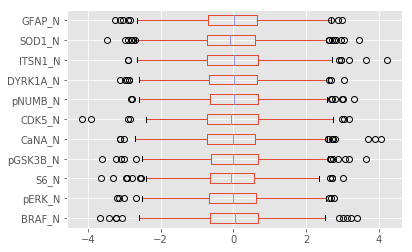

In [21]:
# Will give back a normalized (mean = 0) box plot with outliers
targetProteinsBoxPlot = pd.DataFrame(np.random.randn(1080, 11), columns=['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'GFAP_N'])
targetProteinsBoxPlot.boxplot(figsize=(4,4), vert=False)

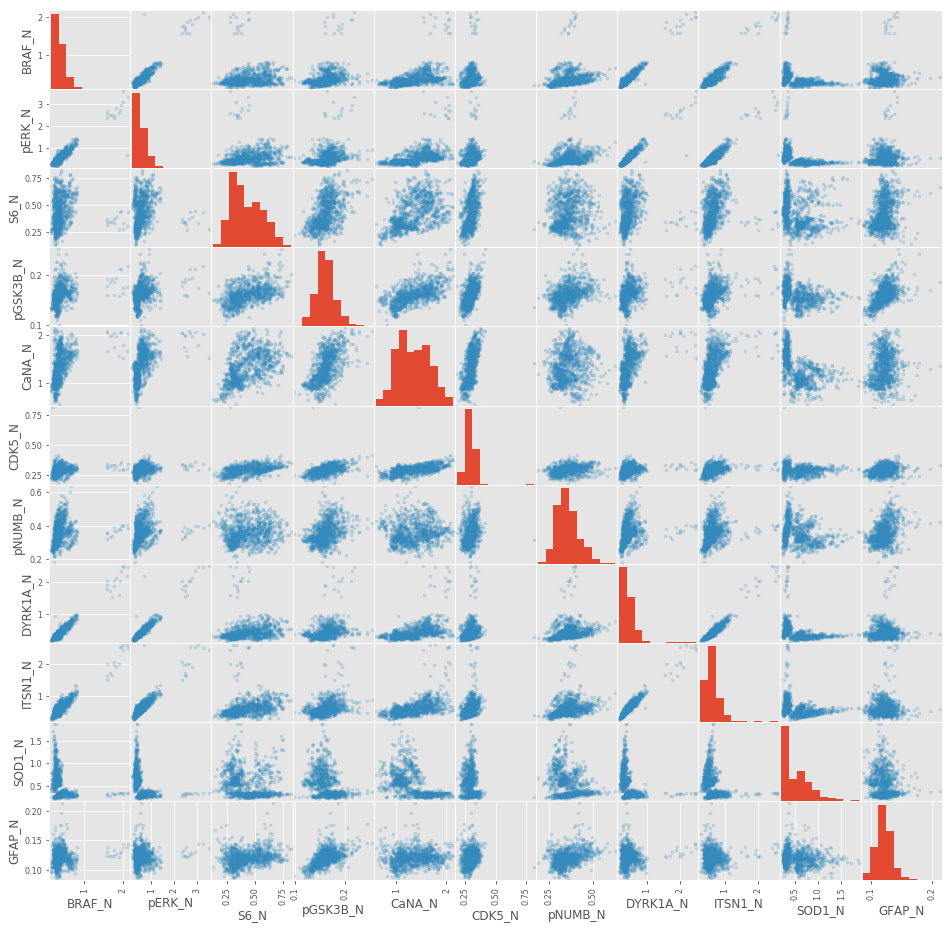

In [22]:
# GIVE TITLE    
from pandas.tools.plotting import scatter_matrix
scatterProteins = targetProteins[['MouseID', 'BRAF_N', 'pERK_N', 'S6_N', 
                                  'pGSK3B_N', 'CaNA_N', 'CDK5_N', 'pNUMB_N', 
                                  'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'GFAP_N']]
scatter_matrix(scatterProteins, alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()
# Update diagonal
# Update title
# Alter cell padding / visualisation?

In [23]:
# ADD DESCRIPTION / TITLE
proteinNames = ['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 'CaNA_N', 'CDK5_N', 'pNUMB_N', 
                'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'GFAP_N']
miceIDs = proteinExpression['MouseID'].str.split('_').apply(pd.Series, 1)[0].unique()
MakeMouseID = proteinExpression['MouseID'].str.split('_').apply(pd.Series, 1)[0].unique()

In [24]:
# DESCRIPTION + 'Where SD = Standard Deviation'
proteinRows = []
for proteinName in proteinNames:
    count = targetProteins[proteinName].count()
    mean = targetProteins[proteinName].mean()
    sd = targetProteins[proteinName].std()
    minusThreeSD = mean - (3 * sd)
    minusTwoSD = mean - (2 * sd)
    twoSD = mean + (2 * sd)
    threeSD = mean + (3 * sd)
    outliers = targetProteins.query(proteinName + ' < ' + str(minusThreeSD) + 
                                    ' | ' + proteinName + ' > ' + str(threeSD))

    row = {'Protein': proteinName,'Count': count,'Mean': mean,'SD': sd,
           '-3SD': minusThreeSD,'-2SD': minusTwoSD,'+2SD': twoSD,
           '+3SD': threeSD,'Outliers': outliers[proteinName].count()}
    proteinRows.append(row)

nnPctRangeDF = pd.DataFrame(proteinRows, index=proteinNames, 
                            columns=['Count', 'Mean', 'SD', '-3SD', 
                                     '-2SD', '+2SD', '+3SD', 'Outliers'])
#nnPctRangeDF shows us the number of outliers count for each protein

In [25]:
# Add description
print nnPctRangeDF

          Count      Mean        SD      -3SD      -2SD      +2SD      +3SD  \
BRAF_N     1077  0.378519  0.216388 -0.270645 -0.054257  0.811294  1.027682   
pERK_N     1077  0.545904  0.345309 -0.490023 -0.144714  1.236522  1.581831   
S6_N       1080  0.429226  0.137440  0.016905  0.154345  0.704106  0.841546   
pGSK3B_N   1080  0.161211  0.019308  0.103287  0.122595  0.199827  0.219135   
CaNA_N     1080  1.337784  0.317126  0.386405  0.703531  1.972036  2.289162   
CDK5_N     1080  0.292434  0.037380  0.180294  0.217674  0.367194  0.404574   
pNUMB_N    1077  0.357095  0.063025  0.168019  0.231044  0.483145  0.546171   
DYRK1A_N   1077  0.425810  0.249362 -0.322276 -0.072914  0.924534  1.173896   
ITSN1_N    1077  0.617102  0.251640 -0.137818  0.113822  1.120382  1.372022   
SOD1_N     1077  0.542635  0.280568 -0.299070 -0.018501  1.103771  1.384339   
GFAP_N     1080  0.120889  0.013233  0.081189  0.094423  0.147356  0.160589   

          Outliers  
BRAF_N          15  
pERK_N   

In [26]:
# DESCRIPTION + 'Where SD = Standard Deviation'
outlierMiceRows = []
for proteinName in proteinNames:

    mean = targetProteins[proteinName].mean()
    sd = targetProteins[proteinName].std()
    minusThreeSD = mean - (3 * sd)
    threeSD = mean + (3 * sd)
    outliers = targetProteins.query(proteinName + ' < ' + str(minusThreeSD) + 
                                    ' | ' + proteinName + ' > ' + str(threeSD))

    if outliers.empty:
        row = {'Protein': proteinName,'MouseID': '-','# Instances': '-','Genotype': '-',
           'Treatment': '-','Behavior': '-','Class': '-'}
        outlierMiceRows.append(row)
    else:
        for mouseID in miceIDs:
            mouseOutlierRows = outliers[outliers['MouseID'].str.contains(mouseID)]
            if not mouseOutlierRows.empty:
                    row = {'Protein': proteinName,'MouseID': mouseID,
                           '# Instances': len(mouseOutlierRows),
                           'Genotype': mouseOutlierRows['Genotype'].iloc[0],
                           'Treatment': mouseOutlierRows['Treatment'].iloc[0],
                           'Behavior': mouseOutlierRows['Behavior'].iloc[0],
                           'Class': mouseOutlierRows['Class'].iloc[0]}
                    outlierMiceRows.append(row)

outliersDF = pd.DataFrame(outlierMiceRows, 
                          columns=['Protein', 'MouseID','# Instances', 
                                   'Genotype','Treatment', 'Behavior', 'Class'])

In [27]:
# Add description
print outliersDF

     Protein MouseID # Instances Genotype Treatment Behavior Class
0     BRAF_N    3484          15        1         1        1     7
1     pERK_N    3484          14        1         1        1     7
2       S6_N       -           -        -         -        -     -
3   pGSK3B_N    3415           1        1         0        1     6
4   pGSK3B_N  50810A           4        1         1        1     7
5   pGSK3B_N  50810D           2        1         1        1     7
6   pGSK3B_N  50810F           3        1         1        1     7
7   pGSK3B_N   18899           1        0         1        1     3
8     CaNA_N       -           -        -         -        -     -
9     CDK5_N    3480           1        1         1        1     7
10    CDK5_N  50810A           2        1         1        1     7
11   pNUMB_N     311           1        1         0        1     6
12   pNUMB_N    3497           5        1         1        1     7
13  DYRK1A_N    3484          15        1         1        1  

In [32]:
# Stripping all outliers back to NaN
def make_nans(row):
    for proteinName in proteinNames:
        mean = targetProteins[proteinName].mean()
        sd = targetProteins[proteinName].std()
        minusThreeSD = mean - (3 * sd)
        threeSD = mean + (3 * sd)
    
        if row[proteinName] < minusThreeSD or row[proteinName] > threeSD:
            row[proteinName] = None
        return row
targetProteins = targetProteins.apply(make_nans, axis=1)

In [33]:
# Checking for missing values - native outliers stripped to NaN
missingValueCheck = targetProteins[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 
                        'ITSN1_N', 'SOD1_N', 'GFAP_N']].isnull()
missingValueList = missingValueCheck.apply(pd.Series.value_counts)
print missingValueList

       BRAF_N  pERK_N    S6_N  pGSK3B_N  CaNA_N  CDK5_N  pNUMB_N  DYRK1A_N  \
False    1046    1062  1065.0    1065.0  1065.0  1065.0     1062      1062   
True       19       3     NaN       NaN     NaN     NaN        3         3   

       ITSN1_N  SOD1_N  GFAP_N  
False     1062    1062  1065.0  
True         3       3     NaN  


Discuss finding above...

In [29]:
# Removal of mouse 3484_n
targetProteins = targetProteins[~targetProteins['MouseID'].str.contains('3484')]
indexOfMouse = np.where(miceIDs=='3484')[0]
miceIDs = np.delete(miceIDs, indexOfMouse)

In [35]:
# Convert all remaining NaNs to the average value of that protein for that class
def make_averages(row):
    for proteinName in proteinNames:
        if np.isnan(row[proteinName]):
            average = targetProteins[targetProteins.Class == row['Class']][proteinName].mean()
            row[proteinName] = average
    return row
targetProteins = targetProteins.apply(make_averages, axis=1)

In [36]:
# Checking for missing values
missingValueCheck = targetProteins[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 
                        'ITSN1_N', 'SOD1_N', 'GFAP_N']].isnull()
missingValueList = missingValueCheck.apply(pd.Series.value_counts)
print missingValueList

       BRAF_N  pERK_N  S6_N  pGSK3B_N  CaNA_N  CDK5_N  pNUMB_N  DYRK1A_N  \
False    1065    1065  1065      1065    1065    1065     1065      1065   

       ITSN1_N  SOD1_N  GFAP_N  
False     1065    1065    1065  


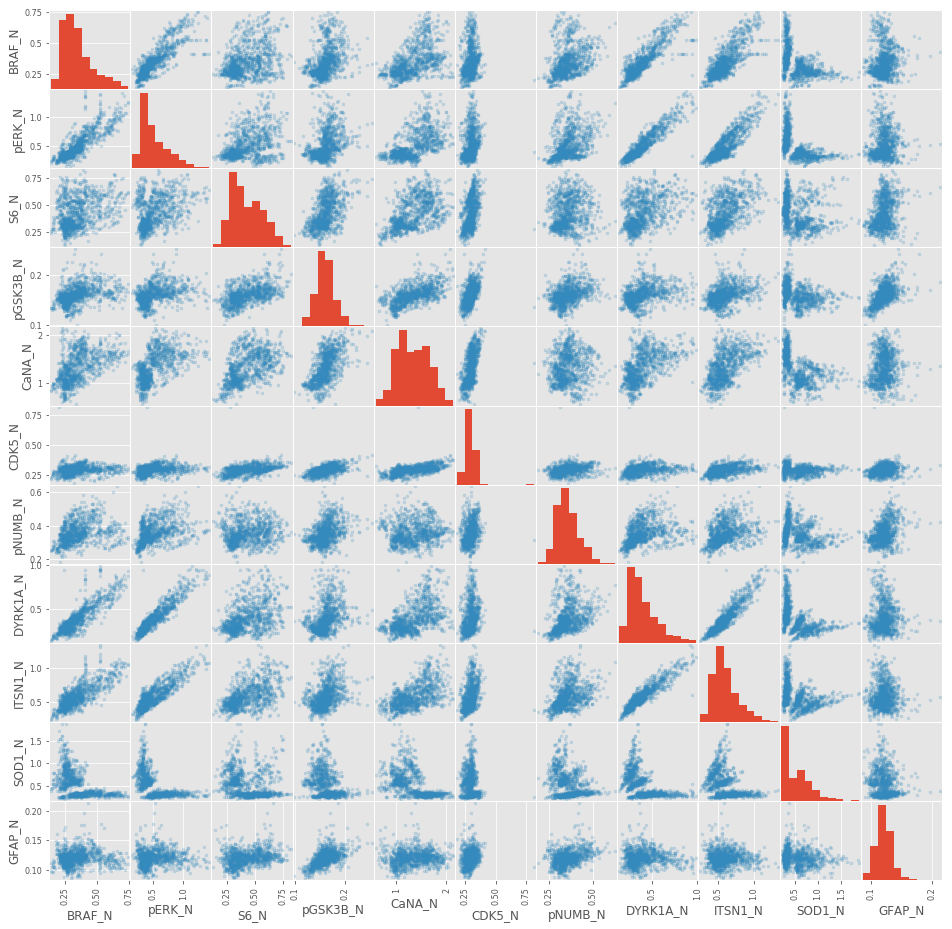

In [37]:
# ADD TITLE
scatterProteins = targetProteins[['MouseID', 'BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                                  'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 
                                  'SOD1_N', 'GFAP_N']]
scatter_matrix(scatterProteins, alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()
# Apply changes as above

In [38]:
# Write this dataframe to a CSV file for later use
targetProteins.to_csv("finalData.csv")